In [1]:
 import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.ndimage.filters import gaussian_filter1d
import sqlite3 as sql
import os
import pandas as pd
from datetime import datetime
from glob import glob
import PlaceCellAnalysis as pc
import single_session_plots as ssp
import SimilarityMatrixAnalysis as sm

os.sys.path.append('../')
import utilities as u
import preprocessing as pp
import behavior as b


%load_ext autoreload
%autoreload 2

%matplotlib inline

C:\Users\mplitt\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
mouse = '4139224.2'
df = pp.load_session_db()


df = df[df['RewardCount']>20]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]
df_mouse

,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,DateTime,data file,scanfile,scanmat
804,4139224.2,17_10_2018,1,TwoTower_noTimeout,60,1,2018-10-17,G:\My Drive\\VR_Data\TwoTower\4139224.2\17_10_...,G:\My Drive\2P_Data\TwoTower\4139224.2\17_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\17_10_2...
820,4139224.2,18_10_2018,2,TwoTower_noTimeout,58,1,2018-10-18,G:\My Drive\\VR_Data\TwoTower\4139224.2\18_10_...,G:\My Drive\2P_Data\TwoTower\4139224.2\18_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\18_10_2...
844,4139224.2,19_10_2018,2,TwoTower_noTimeout,60,1,2018-10-19,G:\My Drive\\VR_Data\TwoTower\4139224.2\19_10_...,G:\My Drive\2P_Data\TwoTower\4139224.2\19_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\19_10_2...
877,4139224.2,22_10_2018,1,TwoTower_Timeout,40,1,2018-10-22,G:\My Drive\\VR_Data\TwoTower\4139224.2\22_10_...,G:\My Drive\2P_Data\TwoTower\4139224.2\22_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\22_10_2...
924,4139224.2,25_10_2018,1,TwoTower_Timeout,57,1,2018-10-25,G:\My Drive\\VR_Data\TwoTower\4139224.2\25_10_...,G:\My Drive\2P_Data\TwoTower\4139224.2\25_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\25_10_2...
961,4139224.2,27_10_2018,3,TwoTower_Timeout,68,1,2018-10-27,G:\My Drive\\VR_Data\TwoTower\4139224.2\27_10_...,G:\My Drive\2P_Data\TwoTower\4139224.2\27_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.2\27_10_2...


In [9]:
data = pp.behavior_dataframe([df_mouse['data file'].iloc[i] for i in range(3,df_mouse.shape[0],1)],concat=False)

C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:189: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


((<matplotlib.figure.Figure at 0x1f2263205c0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1f226320d68>),
 (<matplotlib.figure.Figure at 0x1f222fa15c0>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1f223100978>),
 (<matplotlib.figure.Figure at 0x1f22316aba8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1f223176390>))

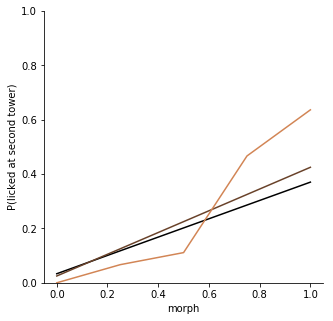

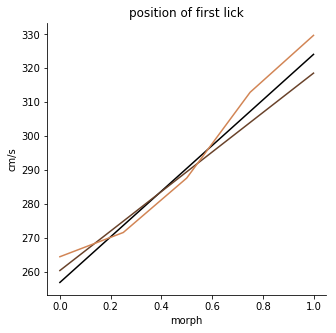

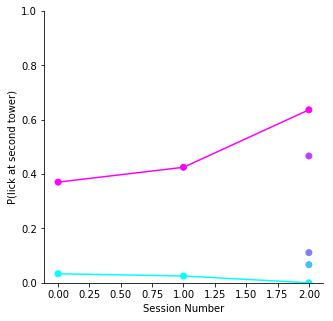

In [10]:
b.learning_curve_plots(data)

In [11]:
# load behavior
sess = df_mouse.iloc[-1]
VRDat, C,Cd,S, A = pp.load_scan_sess(sess)


# check to make sure sbx and cnmf timeseries are same length

G:\My Drive\2P_Data\TwoTower\4139224.2\27_10_2018\TwoTower_Timeout\TwoTower_Timeout_003_001.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\preprocessing.py:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcas

G:\My Drive\2P_Data\TwoTower\4139224.2\27_10_2018\TwoTower_Timeout\TwoTower_Timeout_003_001.mat
#subsystem#not made into numpy array
frame diff 0


In [31]:
info = pp.loadmat_sbx(sess.scanmat)

G:\My Drive\2P_Data\TwoTower\4139219.3\23_10_2018\TwoTower_Timeout\TwoTower_Timeout_001_015.mat


In [37]:
print(info['info'].keys())
print(info['info']['channels'])
print(os.path.getsize(sess.scanmat[:-3]+'sbx'))
#d.bytes/info.recordsPerBuffer/info.sz(2)*factor/4 -1

dict_keys(['frame', 'line', 'event_id', 'resfreq', 'postTriggerSamples', 'recordsPerBuffer', 'bytesPerBuffer', 'channels', 'ballmotion', 'abort_bit', 'scanbox_version', 'scanmode', 'config', 'sz', 'otwave', 'otwave_um', 'otparam', 'otwavestyle', 'volscan', 'power_depth_link', 'opto2pow', 'area_line', 'calibration', 'objective', 'messages', 'usernotes'])
2
20714237952


In [12]:
# by trial info and position binned neural data
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
C_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(C,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values)
C_morph_dict = u.trial_type_dict(C_trial_mat,trial_info['morphs'])
occ_morph_dict = u.trial_type_dict(occ_trial_mat,trial_info['morphs'])

lick_trial_mat,tmp, edges, centers = u.make_pos_bin_trial_matrices(VRDat['lick']._values,
                                        VRDat['pos']._values,
                                        VRDat['tstart']._values,
                                        VRDat['teleport']._values,bin_size=5)
lick_morph_dict = u.trial_type_dict(lick_trial_mat,trial_info['morphs'])
max_pos = np.copy(trial_info['max_pos'])
max_pos[max_pos>440]=np.nan

C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:189: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


C:\Users\mplitt\MightyMorphingPhotonRangers\behavior.py:106: RuntimeWarning: invalid value encountered in true_divide
  rzone_lick_ratio[m] = np.divide(zone0_lick_rate,zone0_lick_rate+zone1_lick_rate)


(<matplotlib.figure.Figure at 0x1f222fa1e80>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x1f2231a2dd8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1f2235f2198>))

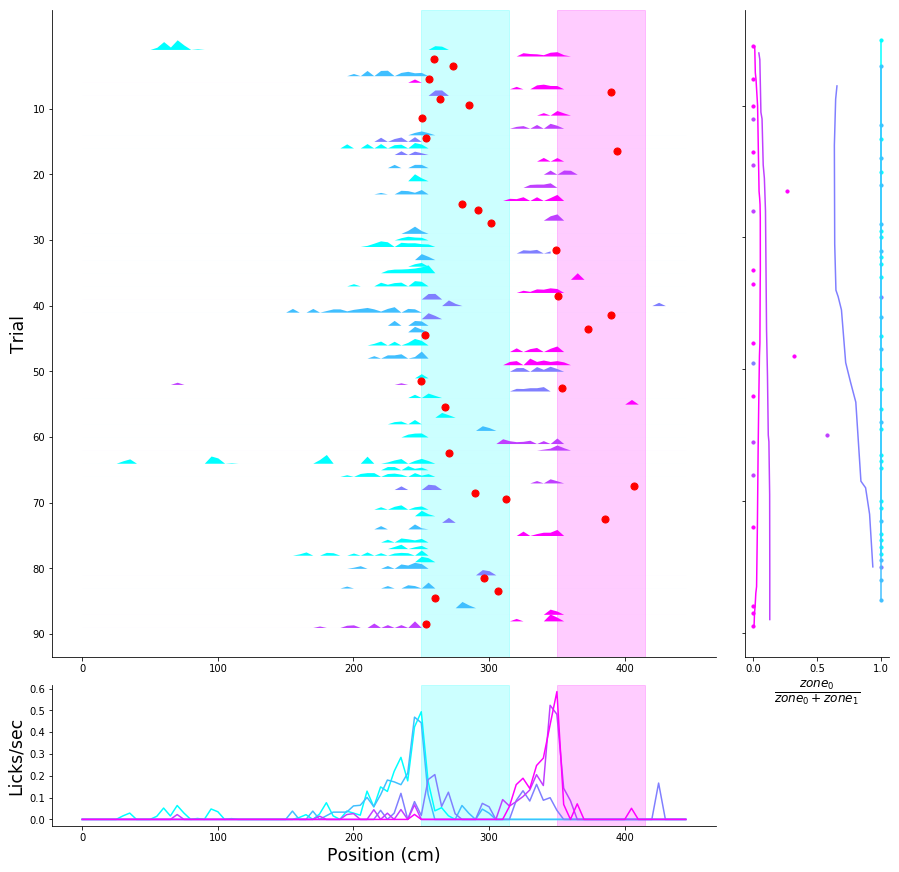

In [13]:
b.lick_plot(lick_morph_dict,edges,max_pos=max_pos,smooth=False)

G:\My Drive\2P_Data\TwoTower\4139224.2\27_10_2018\TwoTower_Timeout\TwoTower_Timeout_003_001.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\preprocessing.py:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcas

G:\My Drive\2P_Data\TwoTower\4139224.2\27_10_2018\TwoTower_Timeout\TwoTower_Timeout_003_001.mat
#subsystem#not made into numpy array
frame diff 0


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:189: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


morph 0 place cells = 637 out of 827 , 0.770254 
morph 1 place cells = 531 out of 827, 0.642080
common place cells = 414


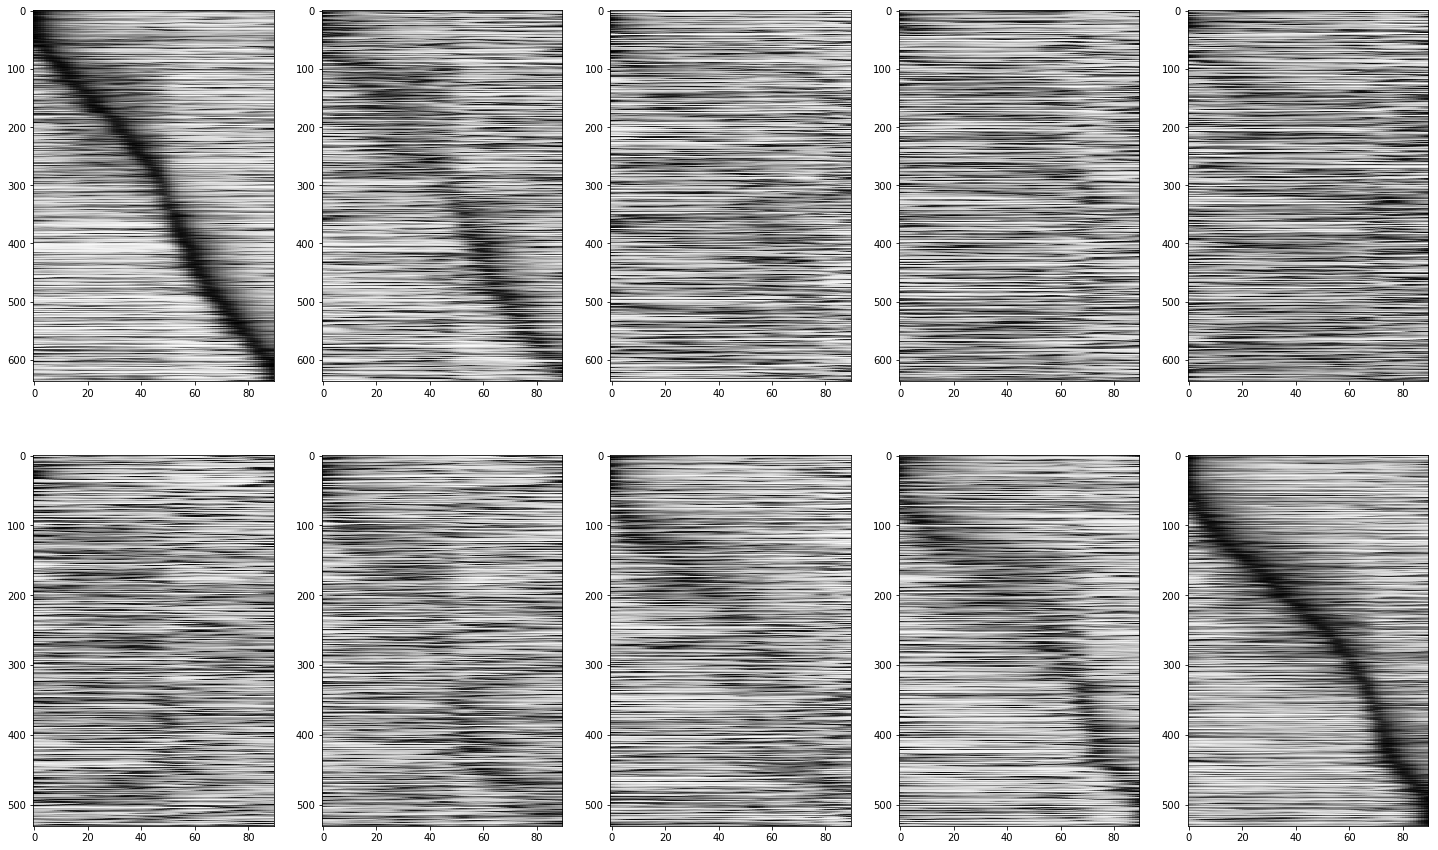

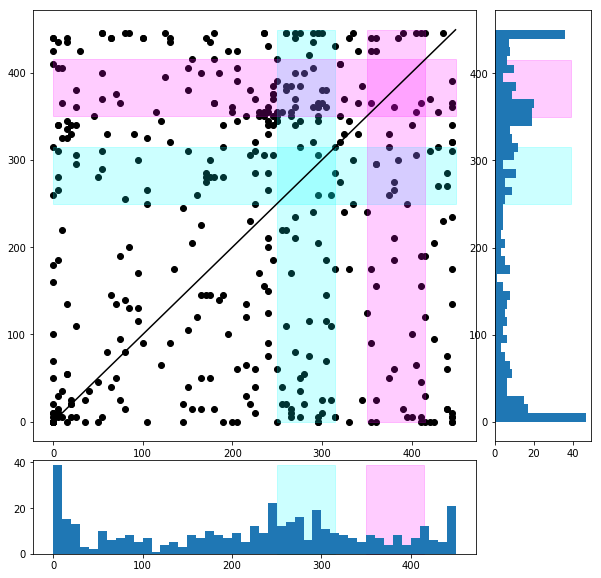

In [15]:
FR, masks, SI = pc.single_session(df_mouse.iloc[-1])
# add filtering for correct trials only

G:\My Drive\2P_Data\TwoTower\4139224.2\27_10_2018\TwoTower_Timeout\TwoTower_Timeout_003_001.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\preprocessing.py:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcas

G:\My Drive\2P_Data\TwoTower\4139224.2\27_10_2018\TwoTower_Timeout\TwoTower_Timeout_003_001.mat
#subsystem#not made into numpy array
frame diff 0
(26609, 827)


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:189: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


sim script (90,) (90,)
(827, 90) (90, 827)
(827, 180) (90, 827)
(827, 270) (90, 827)
(827, 360) (90, 827)


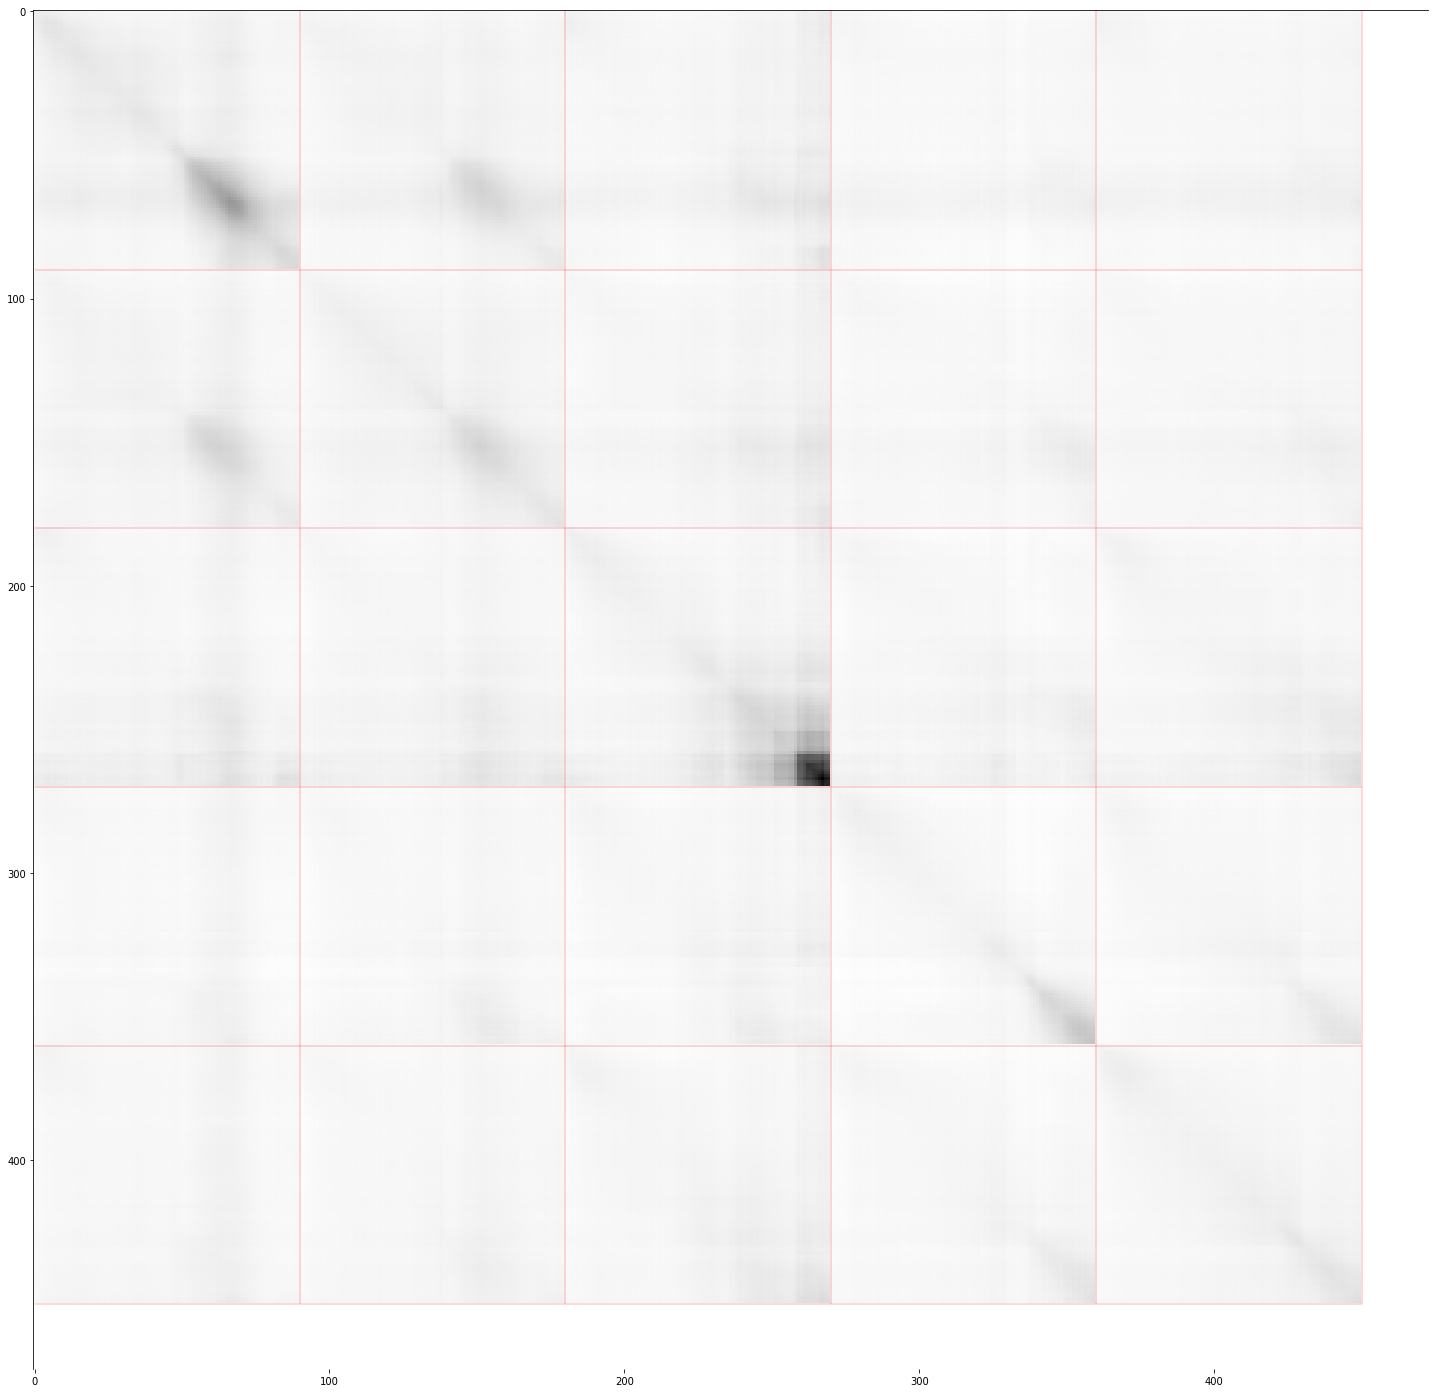

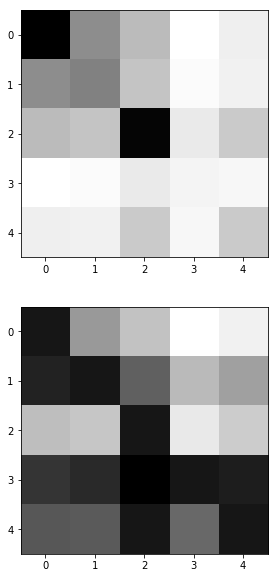

In [16]:
# similarity matrix
S, U, U_norm, (f,ax_S), (f_U, ax_U) = sm.single_session(df_mouse.iloc[-1])

In [51]:
# decoding
#  set up encoding models
dmat = pos_morph_design_matrix(behav['pos']._values,behav['morph']._values)
train_inds = ((behav['morph']==1) | (behav['morph']==0)) & (behav['pos']>0)
dmat_extreme = dmat[train_inds,:]
C_extreme = C_z[train_inds,:]

glm_base = sk.linear_model.LinearRegression()

# for cells in session
glm_base.fit(dmat_extreme,C_extreme)
mu_extreme_hat = glm_base.predict(dmat_extreme)


# restrict analysis to cells for which the encoding model was reasonable
r2 = []
for cell in range(C_z.shape[1]):
    glm_tmp = sk.linear_model.LinearRegression()
    glm_tmp.fit(dmat_extreme,C_extreme[:,cell])
    mu_extreme_hat = glm_tmp.predict(dmat_extreme)
    r2.append(glm_tmp.score(dmat_extreme,C_extreme[:,cell]))
r2 = np.array(r2)
r2mask = r2>.05 # arbitrary based on histogram of r2 values
glm_final = sk.linear_model.LinearRegression()
glm_final.fit(dmat_extreme,C_extreme[:,r2mask])

# find position transition probabilities
morph0inds = behav['morph']==0
XX_I0, xbins = transition_prob_matrix(behav['pos']._values[morph0inds],binsize=5)

morph1inds = behav['morph']==1
XX_I1, xbins = transition_prob_matrix(behav['pos']._values[morph1inds],binsize=5)
xbins = np.array(xbins)

pos_binned = np.digitize(behav['pos']._values,xbins,right=True)



# get trial by trial info
tstarts,tstops = np.where(behav['tstart']==1)[0],np.where(behav['teleport']==1)[0]

trial_pos, trial_C_z  = [], []
trial_pos_binned = []
for (start,stop) in zip(tstarts,tstops):
    trial_pos.append(behav['pos']._values[start:stop])
    trial_C_z.append(C_z[start:stop,r2mask]) # restrict to well fit cells
    trial_pos_binned.append(pos_binned[start:stop])
d = u.by_trial_info(behav)

# get data for estimating all likelihoods
mu_i0 = glm_final.predict(pos_morph_design_matrix(xbins,np.zeros([xbins.shape[0],])))
mu_i1 = glm_final.predict(pos_morph_design_matrix(xbins,np.ones([xbins.shape[0],])))


(26609, 827)


array([[-7.21101155e-01, -2.54411766e-01, -5.97076590e-01, ...,
         7.18960332e-02, -1.71193520e-02, -1.91869080e-02],
       [-7.33768503e-01, -1.91452542e-01, -6.60027669e-01, ...,
         8.16640638e-02, -1.58724741e-02, -1.92598020e-02],
       [-7.46509686e-01, -1.62520493e-01, -7.05241868e-01, ...,
         7.11672611e-02, -1.24950669e-02, -1.60452898e-02],
       ...,
       [ 4.23750629e+00,  5.52771358e+00,  3.72937586e+00, ...,
        -3.81348341e-02,  4.60868361e-03,  1.28651952e-02],
       [ 4.16124298e+00,  5.46532157e+00,  3.76870463e+00, ...,
        -4.22934285e-02,  4.66814999e-03,  3.95528994e-03],
       [ 4.09359274e+00,  5.40011990e+00,  3.75461537e+00, ...,
        -3.75817799e-02,  4.55824500e-03,  2.87828941e-03]])

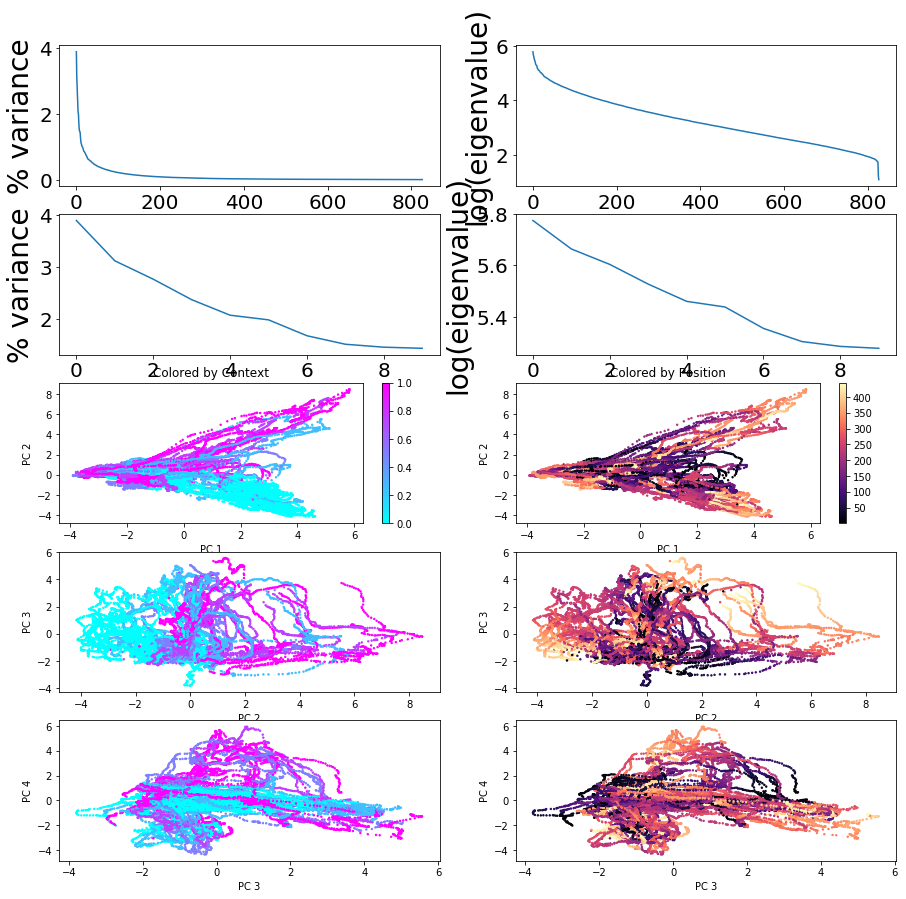

In [17]:
S_z = sp.stats.zscore(S,axis=0)
S_z_smooth = gaussian_filter1d(S_z,3,axis=0)
C_z = sp.stats.zscore(C,axis=0)
ssp.run_PCA(Cd,VRDat)

In [101]:
a = np.arange(0,250,50)
for (x,y) in zip(a[:-1].tolist(),a[1:].tolist()):
    print(x,y)

0 50
50 100
100 150
150 200
